# Analyzing the Naming Pattern Using Python

In this Python project, I have worked with the United States Social Security Administration (SSA) which has made data on the frequency of baby names from 1880 to 2019 available. The project requires analyzing the data considering different methods. I have visualized the most frequent names, determine the naming trends and come up with the most popular names for a certain year.

Let's start...

Import libraries

In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


Populating the interactive namespace from numpy and matplotlib


Popular baby names data provided by Social Security Administration (SSA) of United States.
Download dataset from here:https://www.ssa.gov/oact/babynames/limits.html

loading dataset

In [2]:
b_name=pd.read_csv('../input/popular-name/names/yob1880.txt',names=['name','sex','birth'])

Print first 5 rows

In [3]:
b_name.head()

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


Print total male & female birth in year 1880

In [4]:
b_name.groupby('sex').birth.sum()

sex
F     90994
M    110490
Name: birth, dtype: int64

concatenate dataset 

In [5]:
years=range(1880,2019)
arr=[]
columns=['name','sex','birth']
for year in years:
    path='../input/popular-name/names/yob%d.txt' % year
    frame=pd.read_csv(path,names=columns)
    
    frame['year']=year
    arr.append(frame)

name=pd.concat(arr,ignore_index=True)
name

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957442,Zylas,M,5,2018
1957443,Zyran,M,5,2018
1957444,Zyrie,M,5,2018
1957445,Zyron,M,5,2018


Print total birth of male & feamle in each year

In [6]:
total_birth=name.pivot_table('birth',index='year',columns='sex',aggfunc=sum)

In [7]:
total_birth.head()

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442


Plot'Total Birth by sex and year'

<AxesSubplot:title={'center':'Total Birth by sex and year'}, xlabel='year'>

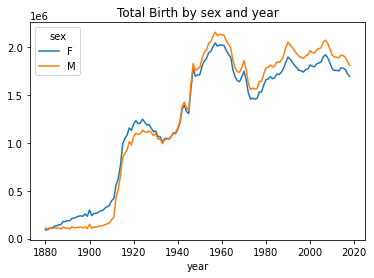

In [8]:
total_birth.plot(title='Total Birth by sex and year')

display a table to print percentage of baby name in each year

In [9]:
def add_pname(popular_name):
    popular_name['popular_name']=((popular_name.birth/popular_name.birth.sum())*100)
    return popular_name

name=name.groupby(['year','sex']).apply(add_pname)
name
    

,name,sex,birth,year,popular_name
0,Mary,F,7065,1880,7.764248
1,Anna,F,2604,1880,2.861727
2,Emma,F,2003,1880,2.201244
3,Elizabeth,F,1939,1880,2.130910
4,Minnie,F,1746,1880,1.918808
...,...,...,...,...,...
1957442,Zylas,M,5,2018,0.000276
1957443,Zyran,M,5,2018,0.000276
1957444,Zyrie,M,5,2018,0.000276
1957445,Zyron,M,5,2018,0.000276


In [10]:
def top_name(popular_name):
    return popular_name.sort_values(by='birth',ascending=False)[:10]
p_name=name.groupby(['sex','birth'])
top_100=p_name.apply(top_name)
top_100.reset_index(inplace=True,drop=True)

Analysing naming trends

In [11]:
boy_name = top_100[top_100.sex == 'M']
girl_name = top_100[top_100.sex == 'F']
total_birth = top_100.pivot_table('birth', index = 'year', columns = 'name', aggfunc = sum)


In [12]:
boy_name .head()

,name,sex,birth,year,popular_name
35156,Ab,M,5,1880,0.004525
35157,Gabin,M,5,2000,0.000255
35158,Franko,M,5,2000,0.000255
35159,Frandy,M,5,2000,0.000255
35160,Franchesco,M,5,2000,0.000255


In [13]:
girl_name.head()

,name,sex,birth,year,popular_name
0,Adelle,F,5,1880,0.005495
1,Tristynn,F,5,1998,0.000283
2,Toshia,F,5,1998,0.000283
3,Trana,F,5,1998,0.000283
4,Trayana,F,5,1998,0.000283


If you enjoyed reading the kernel , hit the upvote button ! Please leave the feedback or suggestions below.
Happy learning!!!